In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination 
# using citipy module
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
#Init the lists
name=[]
lat=[]
max_temp=[]
lng=[]
humidity=[]
cloud=[]
wind_speed=[]
country=[]
date=[]
weather_data={}
#Build partial query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)

In [ ]:
for city in cities : 
    try:
        response=requests.get(query_url + city).json()
        name.append(response['name']) 
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country']) 
        date.append(response['dt'])
        count = cities.index(city)
        cname = response['name']
        print(f'Processing Record {count}: {cname}')
    except KeyError :
        print(f'City {city} not found')

In [ ]:
weather_dict = {
    "City": name,
    "Lat": lat,
    "Lng" : lng,
    "Max temp": max_temp,
    "Humidity" : humidity,
    "Cloudiness" : cloud,
    "Wind speed" : wind_speed, 
    "Country" : country,
    "Date" : date
}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
# city="grand gaube"
# unit="metric"
# query_url = f"{url}appid={weather_api_key}&units={unit}&q="
# test = response=requests.get(query_url + city).json()
weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv(output_data_file)
weather_data.head()

In [3]:
weather_data=pd.read_csv(output_data_file)
weather_data.head()

,Unnamed: 0,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind speed,Country,Date
0,0,Prokhorovka,51.04,36.73,28.40,100,90,8.95,RU,1607947810
1,1,Mataura,-46.19,168.86,51.01,91,13,4.00,NZ,1607947810
2,2,Port-Gentil,-0.72,8.78,86.00,74,40,12.75,GA,1607947810
3,3,Vila Velha,-20.33,-40.29,82.99,65,20,9.17,BR,1607947720
4,4,Dikson,73.51,80.55,-13.38,91,95,8.14,RU,1607947810


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [4]:
#  Get the indices of cities that have humidity over 100%.
humid= (weather_data['Humidity'] > 100)
humid_cities=weather_data[humid]



In [5]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

print(f'There are {len(humid_cities)} cities with humidity > 100%')

There are 0 cities with humidity > 100%


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

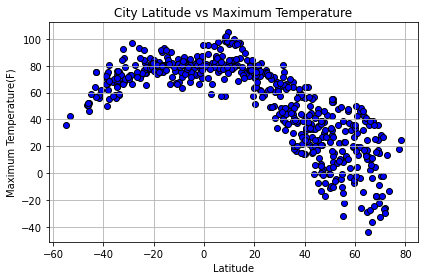

In [6]:
x_val=weather_data["Lat"]
y_val=weather_data["Max temp"]
plt.scatter(x_val, 
            y_val, 
            facecolors='blue',
            edgecolors='black')
plt.title("City Latitude vs Maximum Temperature")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature(F)")
plt.tight_layout()
plt.grid()

                      


## Latitude vs. Humidity Plot

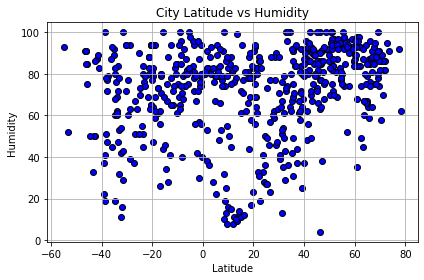

In [7]:
x_val=weather_data["Lat"]
y_val=weather_data["Humidity"]
plt.scatter(x_val, 
            y_val, 
            facecolors='blue',
            edgecolors='black')
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.tight_layout()
plt.grid()


## Latitude vs. Cloudiness Plot

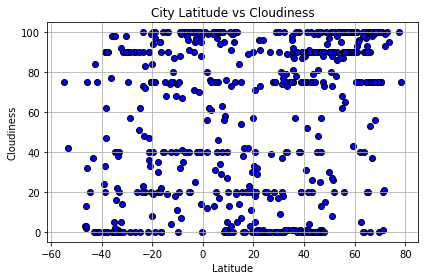

In [8]:
x_val=weather_data["Lat"]
y_val=weather_data["Cloudiness"]
plt.scatter(x_val, 
            y_val, 
            facecolors='blue',
            edgecolors='black')
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.tight_layout()
plt.grid()


## Latitude vs. Wind Speed Plot

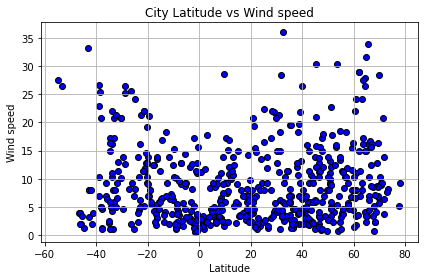

In [13]:
x_val=weather_data["Lat"]
y_val=weather_data["Wind speed"]
plt.scatter(x_val, 
            y_val, 
            facecolors='blue',
            edgecolors='black')
plt.title("City Latitude vs Wind speed")
plt.xlabel("Latitude")
plt.ylabel("Wind speed")
plt.tight_layout()
plt.grid()


## Linear Regression

In [54]:
northern=[]
northern= weather_data.loc[weather_data['Lat'] > 0]
len(northern)

382

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Correlation between Max temp and Latitude is :-0.83
Linear equation for regression : y = -1.35x + 94.23 


ValueError: x and y must have same first dimension, but have shapes (382,) and (568,)

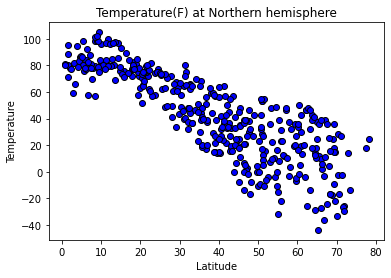

In [55]:
x_values=northern['Lat']
y_values=northern["Max temp"]

#Calculating correlation and regression
correlation = st.pearsonr(x_values, y_values)
print(f'Correlation between Max temp and Latitude is :{round(correlation[0], 2)}')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
r_val = slope * weather_data['Lat'] + intercept
linear_equ=f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
print(f'Linear equation for regression : {linear_equ} ')

#plot the linear regression model
plt.scatter(x_values, 
            y_values, 
            facecolors='blue',
            edgecolors='black'
            )
plt.title("Temperature(F) at Northern hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.plot(x_values,r_val, "r-")
plt.title("City Latitude vs Wind speed")
plt.xlabel("Latitude")
plt.ylabel("Wind speed")
plt.tight_layout()
plt.grid()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression